In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder
# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split
# ALgorithm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sktime.performance_metrics.forecasting import median_relative_absolute_error

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [4]:
df = df.drop(['Id'],axis=1)

In [5]:
basement_nan_str_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[basement_nan_str_cols] = df[basement_nan_str_cols].fillna('NA')

garage_nan_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_nan_str_cols] = df[garage_nan_str_cols].fillna('NA')

In [6]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearRemodAdd'])

In [7]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','YearBuilt','YearRemodAdd'],axis=1)

In [8]:
dummied_df=pd.get_dummies(df,columns=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
                                     'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                     'OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                                      'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                                      'BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','HeatingQC',
                                      'CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                      'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                                      'GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
                                      'SaleType','SaleCondition'])
dummied_df

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,856,856,854,0,1710,2003.0,548,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,1262,1262,0,0,1262,1976.0,460,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,920,920,866,0,1786,2001.0,608,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,756,961,756,0,1717,1998.0,642,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,350.0,1145,1145,1053,0,2198,2000.0,836,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,953,953,694,0,1647,1999.0,460,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,119.0,1542,2073,0,0,2073,1978.0,500,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,0.0,1152,1188,1152,0,2340,1941.0,252,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,0.0,1078,1078,0,0,1078,1950.0,240,...,0,0,0,1,0,0,0,0,1,0


In [9]:
corr_matrix = dummied_df.corr()

In [10]:
important_num_cols = list(dummied_df.corr()["SalePrice"][(dummied_df.corr()["SalePrice"]>0.40) | (dummied_df.corr()["SalePrice"]<-0.40)].index)
#cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
#important_cols = important_num_cols + cat_cols

important_num_cols
derived_df = dummied_df[important_num_cols]

In [12]:
derived_df.info()
#print("Missing Values by Column")
#print("-"*30)
#print(df.isna().sum())
#print("-"*30)
#print("TOTAL MISSING VALUES:",df.isna().sum().sum())
#df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MasVnrArea            1460 non-null   float64
 1   TotalBsmtSF           1460 non-null   int64  
 2   1stFlrSF              1460 non-null   int64  
 3   GrLivArea             1460 non-null   int64  
 4   GarageYrBlt           1460 non-null   float64
 5   GarageArea            1460 non-null   int64  
 6   SalePrice             1460 non-null   int64  
 7   Neighborhood_NridgHt  1460 non-null   uint8  
 8   OverallQual_8         1460 non-null   uint8  
 9   OverallQual_9         1460 non-null   uint8  
 10  ExterQual_Ex          1460 non-null   uint8  
 11  ExterQual_Gd          1460 non-null   uint8  
 12  ExterQual_TA          1460 non-null   uint8  
 13  Foundation_PConc      1460 non-null   uint8  
 14  BsmtQual_Ex           1460 non-null   uint8  
 15  BsmtQual_TA          

In [13]:
#new_df=df.dropna(axis=0, how='any').copy()
#new_df.describe(include='all')

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [13]:
x = derived_df.drop(['SalePrice'],axis=1).copy()
y = derived_df['SalePrice'].copy()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
a = [2,6,8]
b = [5,20,100]
c = [10,20,42]

sum_1 = 0
sum_2 = 0
sum_3 = 0
sum_4 = 0
sum_5 = 0
sum_6 = 0
sum_7 = 0
sum_8 = 0
sum_9 = 0

for k in c:
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = k)
    for i in a:
        for j in b:
            model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
            model_cart.fit(x_validation,y_validation)
            
            validation_pred=model_cart.predict(x_validation)
            rmse=mean_squared_error(y_validation,validation_pred,squared=False)
            
            if i==2 and j==5 and k==10:
                sum_1 += rmse
            if i==2 and j==20 and k==10:
                sum_2 += rmse
            if i==2 and j==100 and k==10:
                sum_3 += rmse
            if i==6 and j==5 and k==10:
                sum_4 += rmse
            if i==6 and j==20 and k==10:
                sum_5 += rmse
            if i==6 and j==100 and k==10:
                sum_6 += rmse    
            if i==8 and j==5 and k==10:
                sum_7 += rmse
            if i==8 and j==20 and k==10:
                sum_8 += rmse
            if i==8 and j==100 and k==10:
                sum_9 += rmse
            
                
print('MSE:')
print('rmse_2_5:',round((sum_1),2))
print('rmse_2_20:',round((sum_2),2))
print('rmse_2_100:',round((sum_3),2))
print('rmse_6_5:',round((sum_4),2))
print('rmse_6_20:',round((sum_5),2))
print('rmse_6_100:',round((sum_6),2))
print('rmse_8_5:',round((sum_7),2))
print('rmse_8_20:',round((sum_8),2))
print('rmse_8_100:',round((sum_9),2))

MSE:
rmse_2_5: 46595.71
rmse_2_20: 46595.71
rmse_2_100: 46595.71
rmse_6_5: 40424.58
rmse_6_20: 24389.19
rmse_6_100: 21756.05
rmse_8_5: 40424.58
rmse_8_20: 23637.29
rmse_8_100: 14499.95


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
a = [2,6,8]
b = [5,20,100]
c = [10,20,42]

sum_1 = 0
sum_2 = 0
sum_3 = 0
sum_4 = 0
sum_5 = 0
sum_6 = 0
sum_7 = 0
sum_8 = 0
sum_9 = 0

for k in c:
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = k)
    for i in a:
        for j in b:
            model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
            model_cart.fit(x_validation,y_validation)
            
            validation_pred=model_cart.predict(x_validation)
            rmse=mean_squared_error(y_validation,validation_pred,squared=False)
            
            if i==2 and j==5 and k==20:
                sum_1 += rmse
            if i==2 and j==20 and k==20:
                sum_2 += rmse
            if i==2 and j==100 and k==20:
                sum_3 += rmse
            if i==6 and j==5 and k==20:
                sum_4 += rmse
            if i==6 and j==20 and k==20:
                sum_5 += rmse
            if i==6 and j==100 and k==20:
                sum_6 += rmse    
            if i==8 and j==5 and k==20:
                sum_7 += rmse
            if i==8 and j==20 and k==20:
                sum_8 += rmse
            if i==8 and j==100 and k==20:
                sum_9 += rmse
            
                
print('MSE:')
print('rmse_2_5:',round((sum_1),2))
print('rmse_2_20:',round((sum_2),2))
print('rmse_2_100:',round((sum_3),2))
print('rmse_6_5:',round((sum_4),2))
print('rmse_6_20:',round((sum_5),2))
print('rmse_6_100:',round((sum_6),2))
print('rmse_8_5:',round((sum_7),2))
print('rmse_8_20:',round((sum_8),2))
print('rmse_8_100:',round((sum_9),2))

MSE:
rmse_2_5: 42113.29
rmse_2_20: 42113.29
rmse_2_100: 42113.29
rmse_6_5: 39366.8
rmse_6_20: 20295.39
rmse_6_100: 14481.96
rmse_8_5: 39366.8
rmse_8_20: 20295.39
rmse_8_100: 8504.93


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
a = [2,6,8]
b = [5,20,100]
c = [10,20,42]

sum_1 = 0
sum_2 = 0
sum_3 = 0
sum_4 = 0
sum_5 = 0
sum_6 = 0
sum_7 = 0
sum_8 = 0
sum_9 = 0

for k in c:
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = k)
    for i in a:
        for j in b:
            model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
            model_cart.fit(x_validation,y_validation)
            
            validation_pred=model_cart.predict(x_validation)
            rmse=mean_squared_error(y_validation,validation_pred,squared=False)
            
            if i==2 and j==5 and k==42:
                sum_1 += rmse
            if i==2 and j==20 and k==42:
                sum_2 += rmse
            if i==2 and j==100 and k==42:
                sum_3 += rmse
            if i==6 and j==5 and k==42:
                sum_4 += rmse
            if i==6 and j==20 and k==42:
                sum_5 += rmse
            if i==6 and j==100 and k==42:
                sum_6 += rmse    
            if i==8 and j==5 and k==42:
                sum_7 += rmse
            if i==8 and j==20 and k==42:
                sum_8 += rmse
            if i==8 and j==100 and k==42:
                sum_9 += rmse
            
                
print('MSE:')
print('rmse_2_5:',round((sum_1),2))
print('rmse_2_20:',round((sum_2),2))
print('rmse_2_100:',round((sum_3),2))
print('rmse_6_5:',round((sum_4),2))
print('rmse_6_20:',round((sum_5),2))
print('rmse_6_100:',round((sum_6),2))
print('rmse_8_5:',round((sum_7),2))
print('rmse_8_20:',round((sum_8),2))
print('rmse_8_100:',round((sum_9),2))

MSE:
rmse_2_5: 49907.38
rmse_2_20: 49907.38
rmse_2_100: 49907.38
rmse_6_5: 44335.96
rmse_6_20: 21996.01
rmse_6_100: 15251.68
rmse_8_5: 44335.96
rmse_8_20: 21996.01
rmse_8_100: 6341.55


In [19]:
#三次平均
mse_2_5 = [46595.71, 42113.29, 49907.38]
mse_2_20 = [46595.71, 42113.29, 49907.38]
mse_2_100 = [46595.71, 42113.29, 49907.38]
mse_6_5 = [40424.58, 39366.8, 44335.96]
mse_6_20 = [24389.19, 20295.39, 21996.01]
mse_6_100 = [21756.05, 14481.96, 15251.68]
mse_8_5 = [40424.58, 39366.8, 44335.96]
mse_8_20 = [23637.29, 20295.39, 21996.01]
mse_8_100 = [14499.95, 8504.93, 6341.55]

print('rmse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('rmse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('rmse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('rmse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('rmse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('rmse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('rmse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('rmse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('rmse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

rmse_2_5: 46205.46 +/- 3193.87
rmse_2_20: 46205.46 +/- 3193.87
rmse_2_100: 46205.46 +/- 3193.87
rmse_6_5: 41375.78 +/- 2137.24
rmse_6_20: 22226.86 +/- 1679.24
rmse_6_100: 17163.23 +/- 3262.78
rmse_8_5: 41375.78 +/- 2137.24
rmse_8_20: 21976.23 +/- 1364.4
rmse_8_100: 9782.14 +/- 3450.93


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model_cart=DecisionTreeRegressor(criterion='mse',max_depth=8,min_samples_leaf=100,random_state=0)
model_cart.fit(x_train,y_train)
train_pred = model_cart.predict(x_train)
test_pred = model_cart.predict(x_test)

y_pred_benchmark = train_pred*1.1
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mae = mean_absolute_error(y_train, train_pred)
train_mdrae = median_relative_absolute_error(y_train, train_pred, y_pred_benchmark=y_pred_benchmark)

y_pred_benchmark = test_pred*1.1
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mae = mean_absolute_error(y_test, test_pred)
test_mdrae = median_relative_absolute_error(y_test, test_pred, y_pred_benchmark=y_pred_benchmark)

print('train_mse : ', np.round(train_mse,2))
print('train_rmse: ', np.round(train_rmse,2))
print('train_mape: ', np.round(train_mape,2))
print('train_smape: ', np.round(train_smape,2))
print('train_mae: ', np.round(train_mae,2))
print('train_mdrae: ', np.round(train_mdrae,2))
print('')
print('test_mse : ', np.round(test_mse,2))
print('test_rmse: ', np.round(test_rmse,2))
print('test_mape: ', np.round(test_mape,2))
print('test_smape: ', np.round(test_smape,2))
print('test_mae: ', np.round(test_mae,2))
print('test_mdrae: ', np.round(test_mdrae,2))

train_mse :  2253510157.08
train_rmse:  47471.15
train_mape:  0.18
train_smape:  16.69
train_mae:  30907.96
train_mdrae:  0.72

test_mse :  3024846433.85
test_rmse:  54998.6
test_mape:  0.2
test_smape:  17.79
test_mae:  34171.39
test_mdrae:  0.74


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [23]:
def generate_index(amount):
    index_list=[]
    for i in range(0,amount):
        idx=i+1
        index_list.append(idx)
    return(index_list)

In [24]:
results=pd.DataFrame({'Y_test_true':y_test,'Y_test_predict':test_pred})
results['count'] = generate_index(amount=len(y_test))
results

,Y_test_true,Y_test_predict,count
1168,235000,186637.484375,1
1169,625000,312013.112676,2
1170,171000,164227.820000,3
1171,163000,164227.820000,4
1172,171900,133925.217687,5
...,...,...,...
1455,175000,157774.131387,288
1456,210000,186637.484375,289
1457,266500,244131.568000,290
1458,142125,121776.060870,291


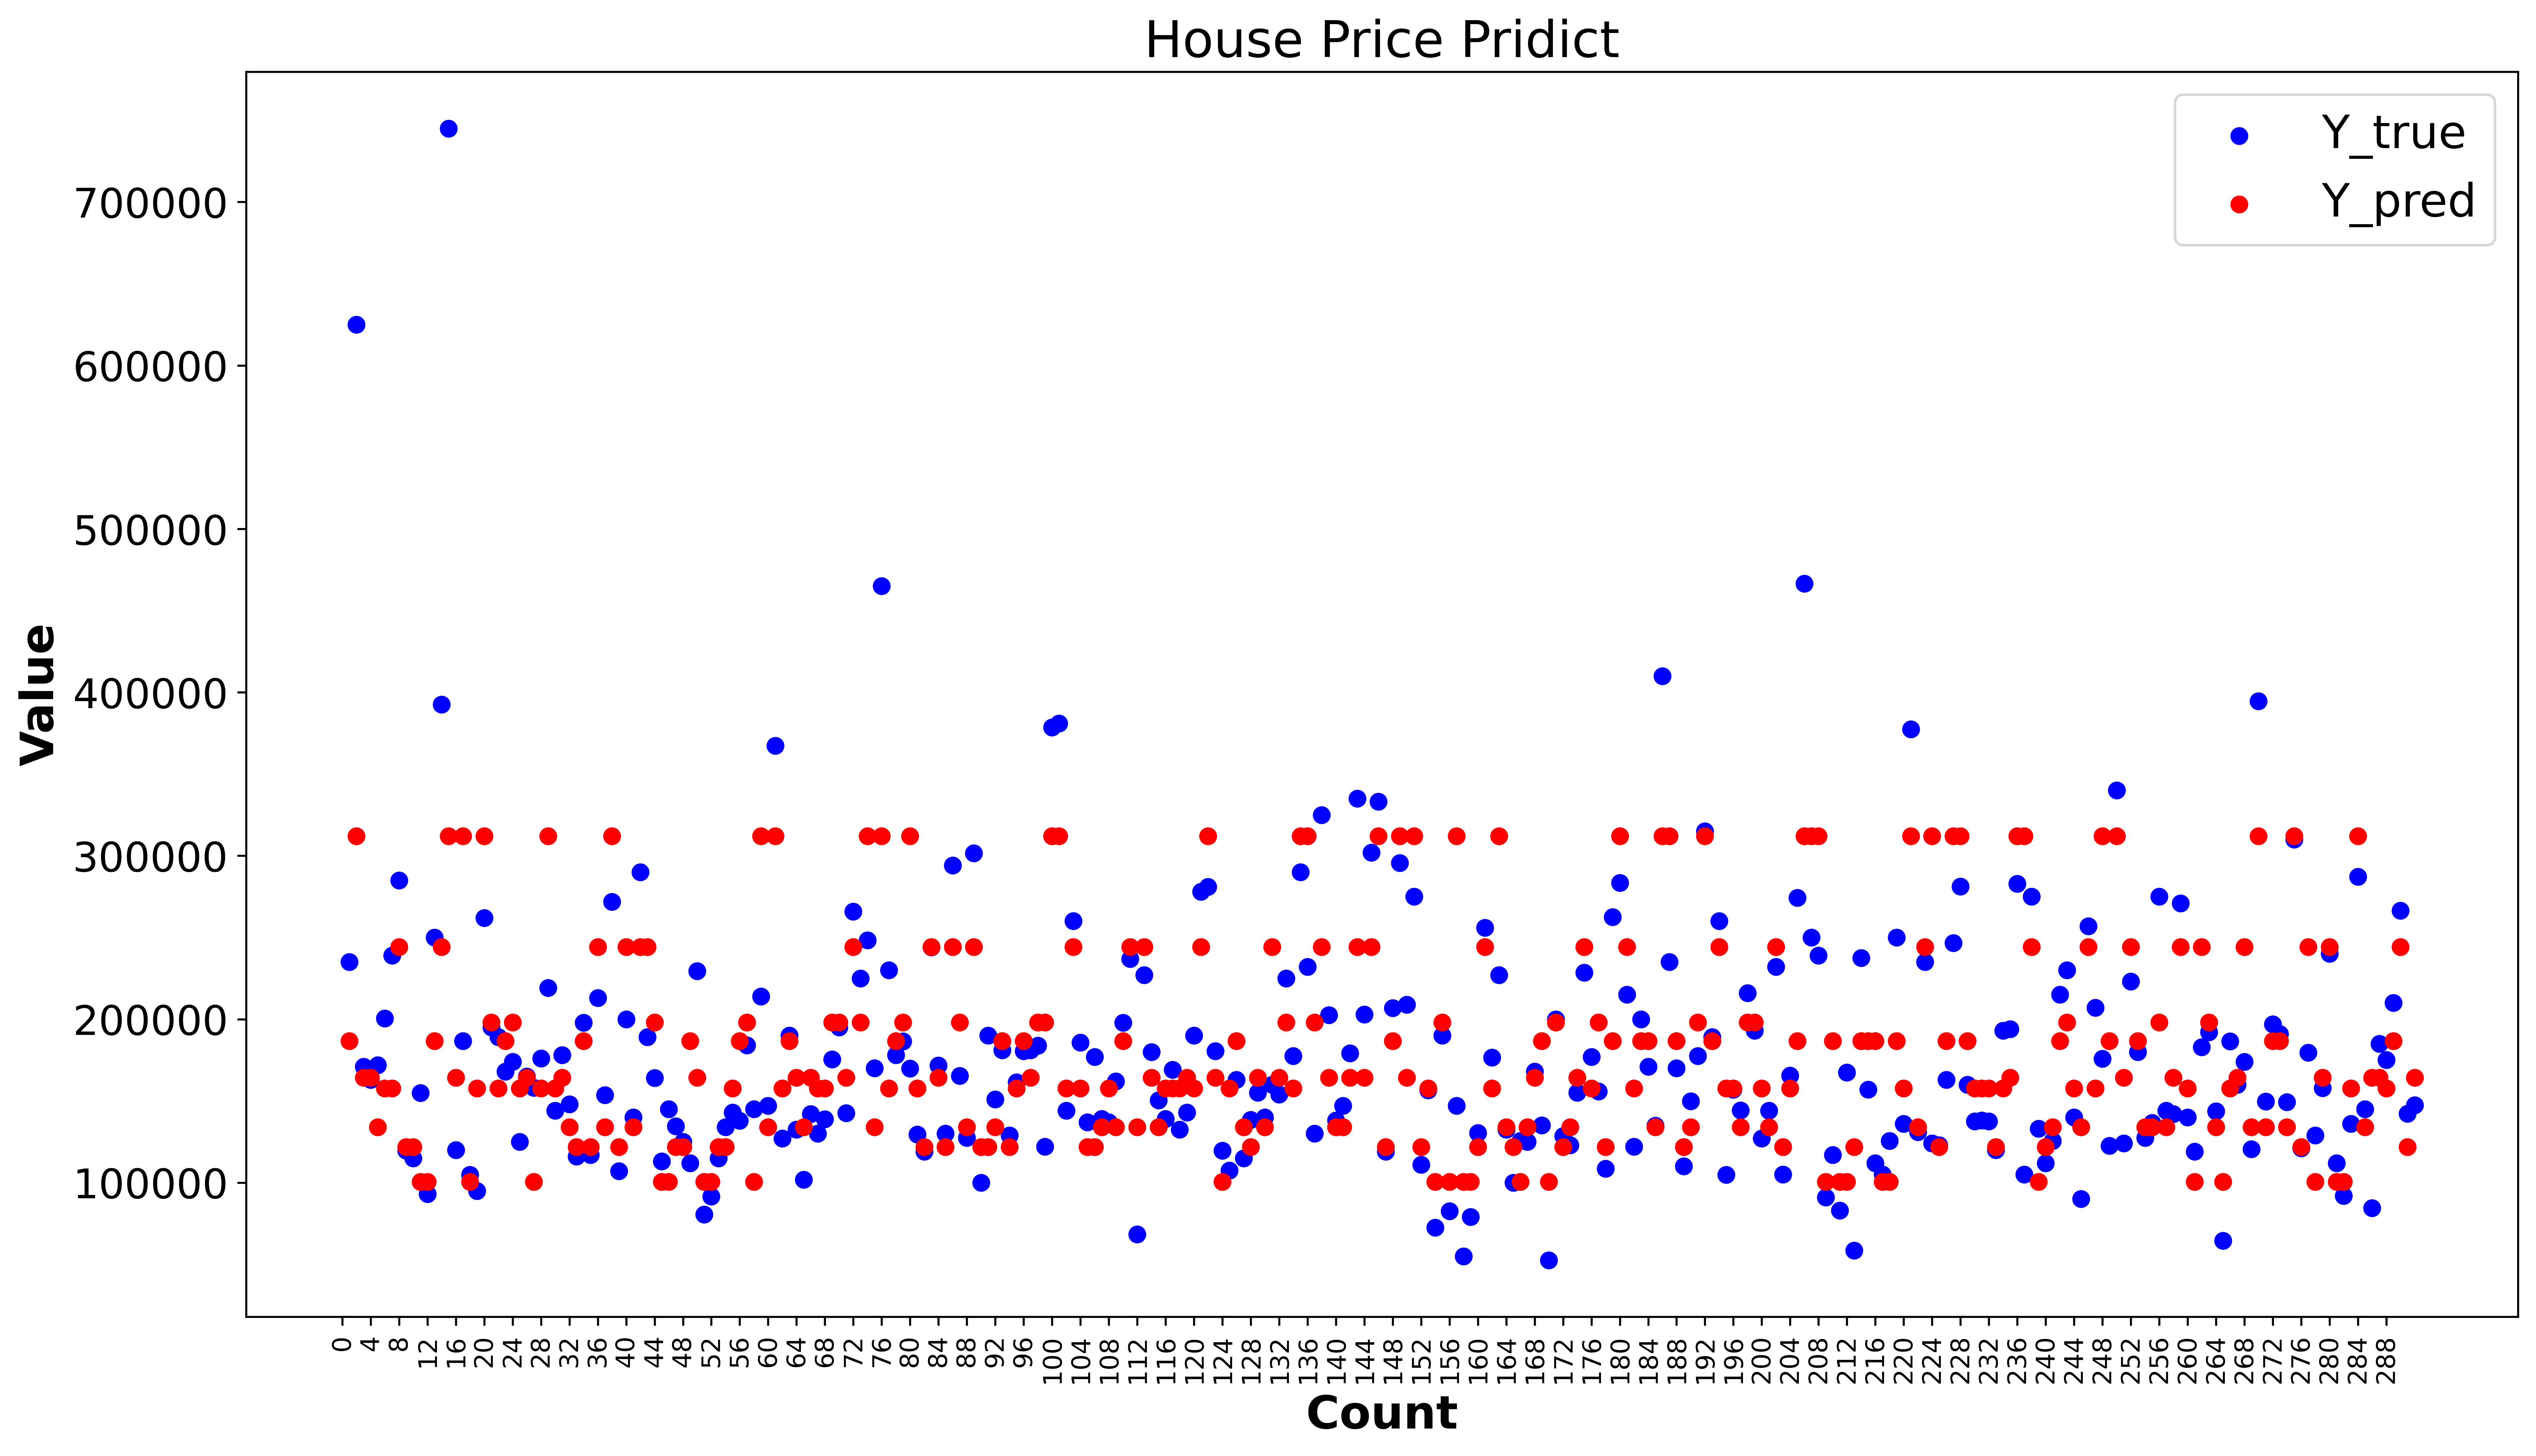

In [27]:
plt.figure(figsize=(16,9),dpi=600)
plt.title('House Price Pridict',fontsize=20)
plt.xlabel('Count',fontsize=18,weight='bold')
plt.ylabel('Value',fontsize=18,weight='bold')
plt.scatter(results.iloc[0:292,2],results.iloc[0:292,0],color='blue',label='Y_true')
plt.scatter(results.iloc[0:292,2],results.iloc[0:292,1],color='red',label='Y_pred')
plt.legend(loc=1,fontsize=18)
#plt.ylim(0,30)
#plt.xlim(0,21)
plt.xticks(np.arange(0, 292, 4), rotation ='vertical')
plt.yticks(fontsize=16)
plt.show()